In [11]:
from Bio import SeqIO
import numpy as np
import seaborn as sns
from scipy.stats import mode
%matplotlib inline
import matplotlib.pyplot as plt 
from glob import glob 

/usr/local/bin/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


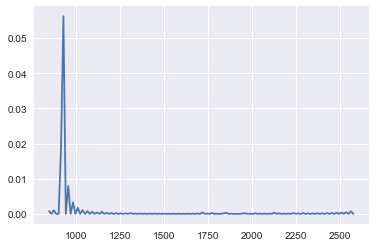

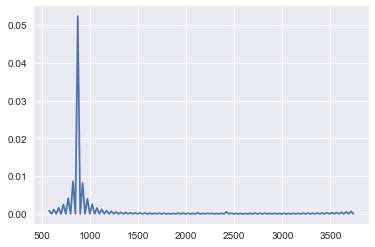

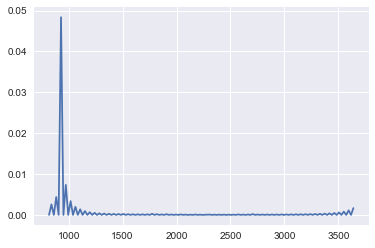

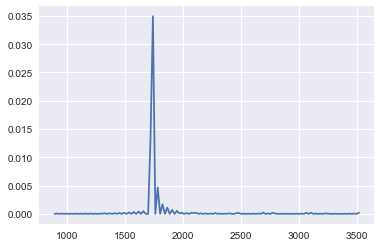

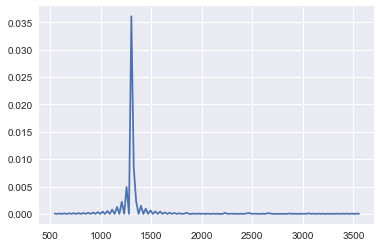

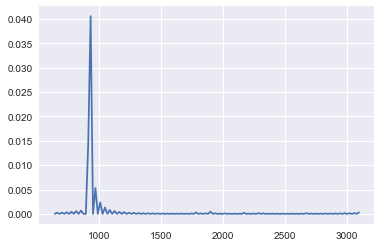

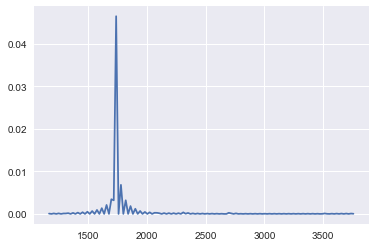

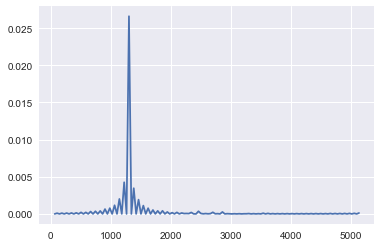

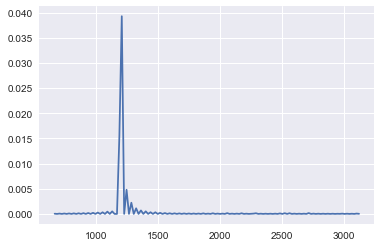

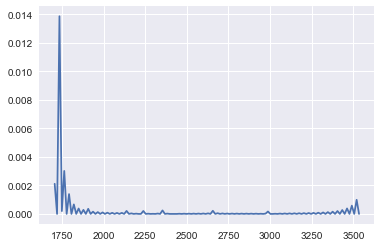

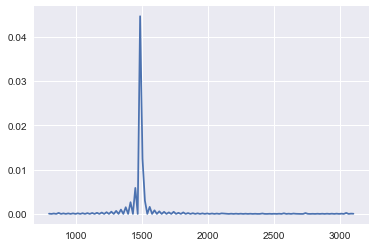

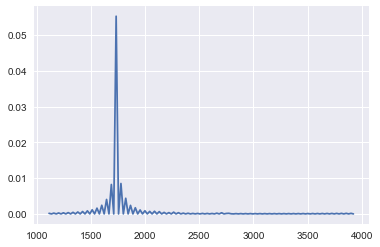

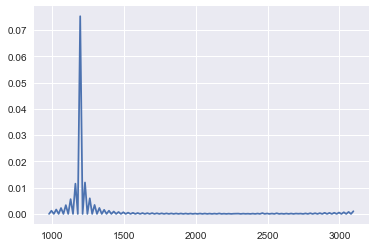

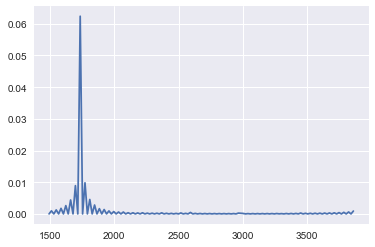

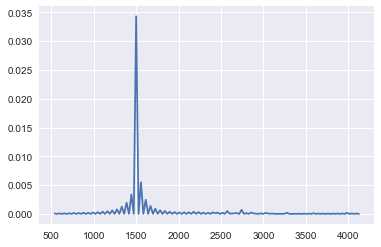

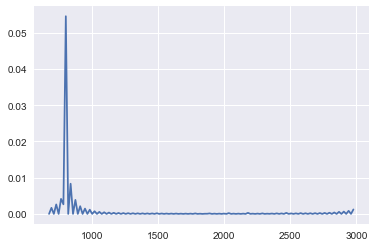

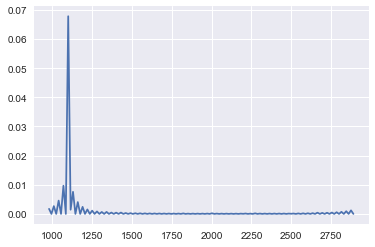

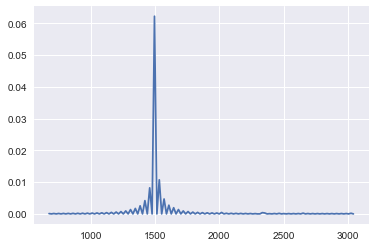

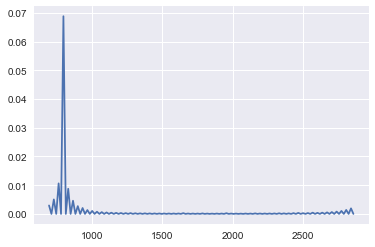

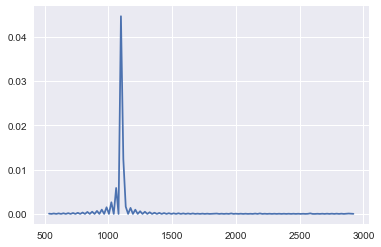

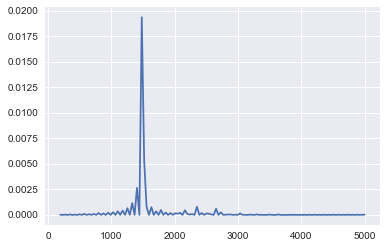

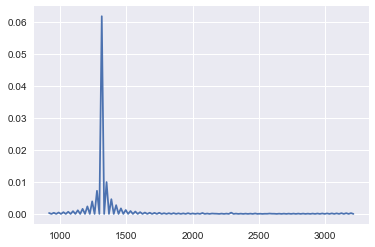

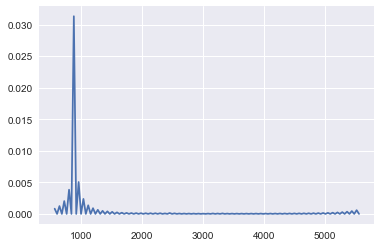

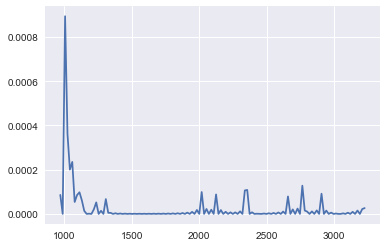

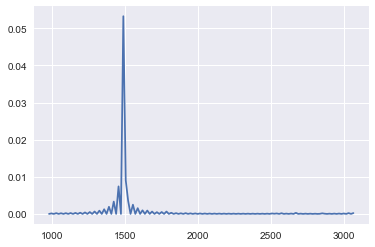

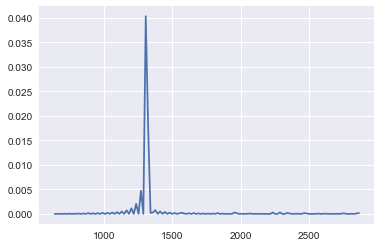

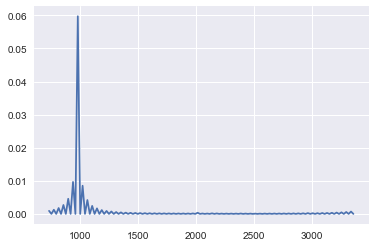

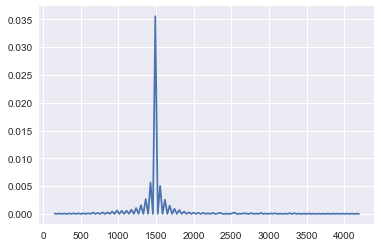

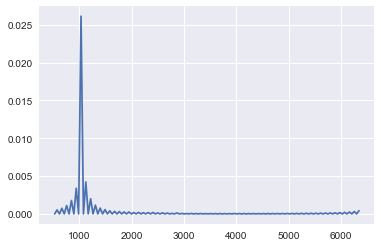

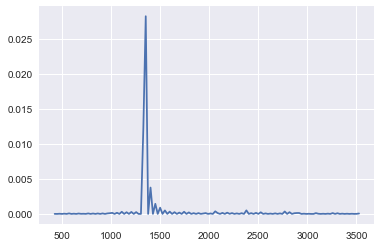

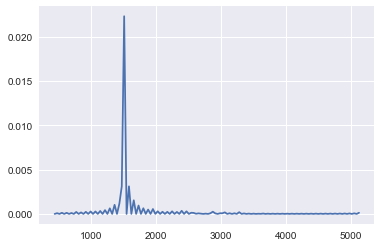

/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


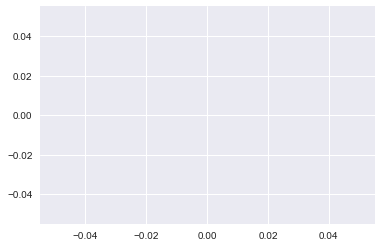

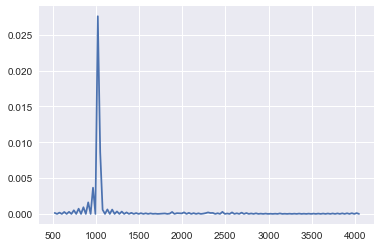

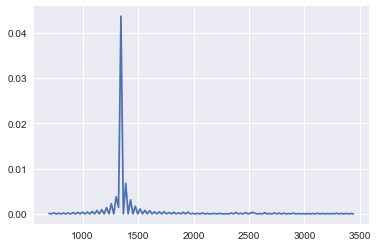

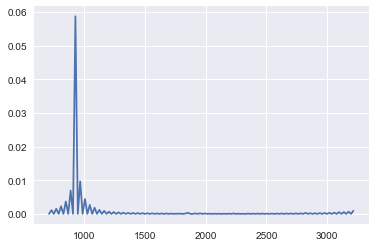

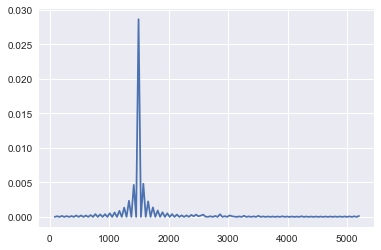

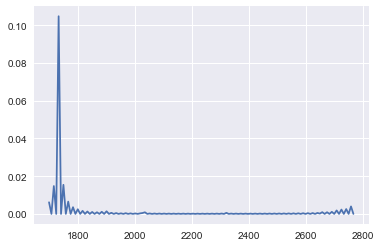

In [17]:
for g in glob( 'output_files/job_output_consensus_pilot/tasks/pbcoretools.tasks.bam2fastq_ccs-0/*.fastq' ):
    fn = SeqIO.parse( g, 'fastq' )
    lens = []
    for rec in fn:
        lens.append( len(rec) )
    
    sns.kdeplot( np.array(lens) ) 
    plt.show()


/usr/local/bin/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


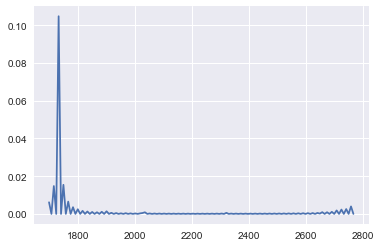

In [4]:
! ls output_files/job_output_consensus_pilot/

html       index.html logs       tasks      workflow


In [12]:
! head -200 output_files/job_output_consensus_pilot/tasks/pbcoretools.tasks.bam2fasta_ccs-0/ccs.0_1.fasta  > example_bc.fasta 

In [13]:
! ls

README.md        aws.pem          my_aws_env
Untitled.ipynb   example_bc.fasta output_files


In [21]:
! mafft --help 


------------------------------------------------------------------------------
  MAFFT v7.305b (2016/Aug/16)
  http://mafft.cbrc.jp/alignment/software/
  MBE 30:772-780 (2013), NAR 30:3059-3066 (2002)
------------------------------------------------------------------------------
High speed:
  % mafft in > out
  % mafft --retree 1 in > out (fast)

High accuracy (for <~200 sequences x <~2,000 aa/nt):
  % mafft --maxiterate 1000 --localpair  in > out (% linsi in > out is also ok)
  % mafft --maxiterate 1000 --genafpair  in > out (% einsi in > out)
  % mafft --maxiterate 1000 --globalpair in > out (% ginsi in > out)

If unsure which option to use:
  % mafft --auto in > out

--op # :         Gap opening penalty, default: 1.53
--ep # :         Offset (works like gap extension penalty), default: 0.0
--maxiterate # : Maximum number of iterative refinement, default: 0
--clustalout :   Output: clustal format, default: fasta
--reorder :      Outorder: aligned, default: input order
--quiet :     

In [20]:
! mafft --auto --op 15.0 --ep 15.0 example_bc.fasta


generating a scoring matrix for nucleotide (dist=200) ... done
All-to-all alignment.
tbfast-pair (nuc) Version 7.305b alg=L, model=DNA200 (2), 2.00 (6.00), -0.10 (-0.30), noshift, amax=0.0
0 thread(s)

Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -15.00, +0.00, -15.00
treein = 0
compacttree = 0
Constructing a UPGMA tree ... 
   10 / 12
done.

Progressive alignment ... 
STEP    11 /11 c
done.
tbfast (nuc) Version 7.305b alg=A, model=DNA200 (2), 15.00 (45.00), 15.00 (45.00), noshift, amax=0.0
0 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = -15000
niter = 16
sueff_global = 0.100000
Loading 'hat3' ... done.
generating a scoring matrix for nucleotide (dist=200) ... done

   10 / 12
Segment   1/  1    1- 983
STEP 003-003-0  identical.    identical.    identical.    accepted. rejected. rejected. identical.    identi

In [ ]:
! cd-hit 